# Homework 0
## Kyle Hadley

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.simplefilter('ignore')

### Plotting 2D Gaussians

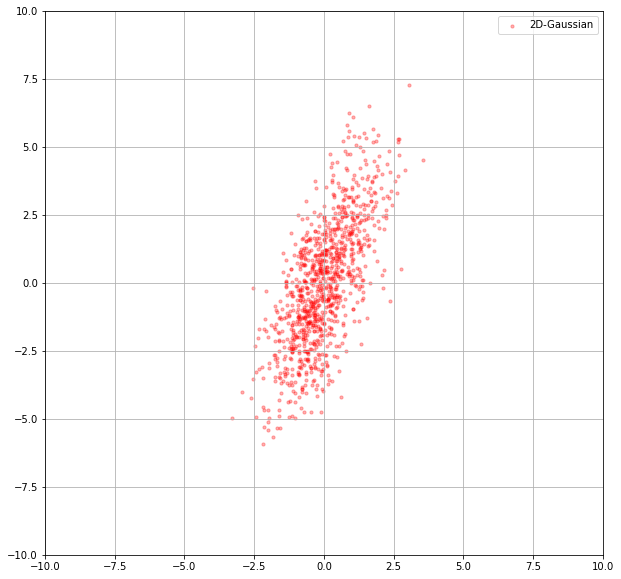

In [3]:
mean = [0,0]
cov = [[1, 1.5], [1.5, 5]]
# Fix random seed to get consistent results. Do not change this seed value.
np.random.seed(11)

# Generate the data set X as random samples from multivariate Gaussians. 
X = np.random.multivariate_normal(mean, cov, 1000)
fig, ax = plt.subplots(figsize=(10, 10))

# c='r', dot color is red
# s=10.0, dot size is 10
# alpha=0.3, dot opacity is 0.3
ax.scatter(X[:,0], X[:,1], c='r', s=10.0, alpha=0.3, label="2D-Gaussian")
ax.grid()
ax.legend(loc = 0)

# Set x/y axis limits
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
fig.show()

###  np.argmax(), np.max() operations

In [4]:
max_indices = np.argmax(X, axis=0)

# Report here the index of the datapoint in X having the largest y-coordinate (along with its value).
index_largest_y = max_indices[1]
print('Index with largest y-coordinate:', index_largest_y)
print('Value at index:', X[index_largest_y], '\n')

# Report here the index of the datapoint in X having the largest x-coordinate (along with its value).
index_largest_x = max_indices[0]
print('Index with largest x-coordinate:', index_largest_x)
print('Value at index:', X[index_largest_x], '\n')

Index with largest y-coordinate: 625
Value at index: [3.03716929 7.29867698] 

Index with largest x-coordinate: 383
Value at index: [3.54798126 4.51280061] 



### Distance computations and sorting

In [5]:
from scipy.spatial.distance import pdist, squareform

# Compute the Euclidean distance between all pairs of points in X and put them in a matrix.
# Then print a submatrix dist[:5, :5]
Y = pdist(X, metric='euclidean')
Y_sq = squareform(Y)
print(Y_sq[:5,:5], '\n')

# Report the indices of top 5 nearest points to datapoint at index '0' in X
# but do not include the '0' point itself.
# Remember that dist[i, i] = 0
Y_sq_sort = np.argsort(Y_sq, axis=0)
#print(Y_sq_sort)
print('Top 5 Nearest Points to datapoint at index \'0\' in X (indices provided):', Y_sq_sort[1:6, 0])

[[0.         5.50014292 4.12233252 5.37818551 3.16377123]
 [5.50014292 0.         1.9926578  2.10275097 2.40233027]
 [4.12233252 1.9926578  0.         1.3179336  1.13668177]
 [5.37818551 2.10275097 1.3179336  0.         2.44906503]
 [3.16377123 2.40233027 1.13668177 2.44906503 0.        ]] 

Top 5 Nearest Points to datapoint at index '0' in X (indices provided): [131 936 273 947 833]


### Mean and Covariance of sampled data points

In [6]:
# Report the mean and covariance (using numpy functions such as np.mean() etc.) of the sampled datapoints
mean = np.mean(X, axis=0)
cov = np.cov(X)

print('Mean of X:\n', mean, '\n')
print('Covariance of X:\n', cov)


Mean of X:
 [-0.0134862  -0.00250821] 

Covariance of X:
 [[ 4.063337    2.35823118  0.38997858 ...  2.55563481  1.44203659
  -1.96238105]
 [ 2.35823118  1.36864215  0.22633113 ...  1.48320892  0.83691204
  -1.13890336]
 [ 0.38997858  0.22633113  0.03742818 ...  0.24527693  0.1383994
  -0.18833943]
 ...
 [ 2.55563481  1.48320892  0.24527693 ...  1.60736589  0.90696856
  -1.23423908]
 [ 1.44203659  0.83691204  0.1383994  ...  0.90696856  0.51176398
  -0.69642889]
 [-1.96238105 -1.13890336 -0.18833943 ... -1.23423908 -0.69642889
   0.94772828]]


### Plotting Histograms

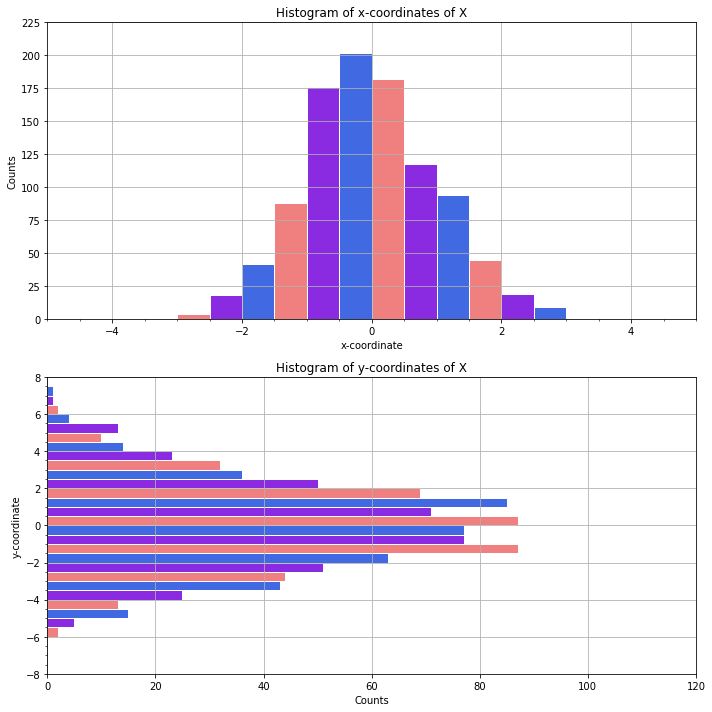

In [7]:
from matplotlib.ticker import MultipleLocator

# Plot the histogram for the x-coordinates of X and y-coordinates of X respectively.
# Hint: use plt.hist() and plt.subplot()
# Properly label the axes and make sure to add subplot titles.
# Experiment with the number of bins in the histogram to make the histogram look attractive.
# By attractive, we mean that it looks good. Data visualization is important,
# and some examples of beautiful data visualization can be found
# here: https://www.pinterest.com/pin/474074298266335483/
# We of course don't expect your histogram to look this good, especially
# since most or all of these graphics are not histograms. But in general,
# throughout this class, please work to make sure your figures and graphics
# of data look as good as possible (and this means getting the right
# colors, spatial layout, scope, lack of clutter, good use of space, etc.). 
# This typically involves some time, and trial and error.

fig, ax = plt.subplots(2, 1, figsize=(10, 10))

bin_range = np.arange(-5, 5, 0.5)
N, bins, patches = ax[0].hist(X[:,0], bins=bin_range, edgecolor='white')

for i in range(0, len(patches)):
    if i % 3 == 0:
        patches[i].set_facecolor('royalblue')
    if i % 3 == 1:
        patches[i].set_facecolor('lightcoral')
    if i % 3 == 2:
        patches[i].set_facecolor('blueviolet')


ax[0].grid()
ax[0].set_xlim([-5, 5])
ax[0].set_ylim([0, 225])
ax[0].xaxis.set_minor_locator(MultipleLocator(0.5))
ax[0].set_title('Histogram of x-coordinates of X')
ax[0].set_xlabel('x-coordinate')
ax[0].set_ylabel('Counts')

bin_range = np.arange(-8, 8, 0.5)
N, bins, patches = ax[1].hist(X[:,1], bins=bin_range, edgecolor='white', orientation='horizontal')

for i in range(0, len(patches)):
    if i % 3 == 0:
        patches[i].set_facecolor('royalblue')
    if i % 3 == 1:
        patches[i].set_facecolor('lightcoral')
    if i % 3 == 2:
        patches[i].set_facecolor('blueviolet')

ax[1].grid()
ax[1].set_ylim([-8, 8])
ax[1].set_xlim([0, 120])
ax[1].yaxis.set_minor_locator(MultipleLocator(0.5))
ax[1].set_title('Histogram of y-coordinates of X')
ax[1].set_ylabel('y-coordinate')
ax[1].set_xlabel('Counts')

fig.tight_layout()
fig.show()

### Line plots

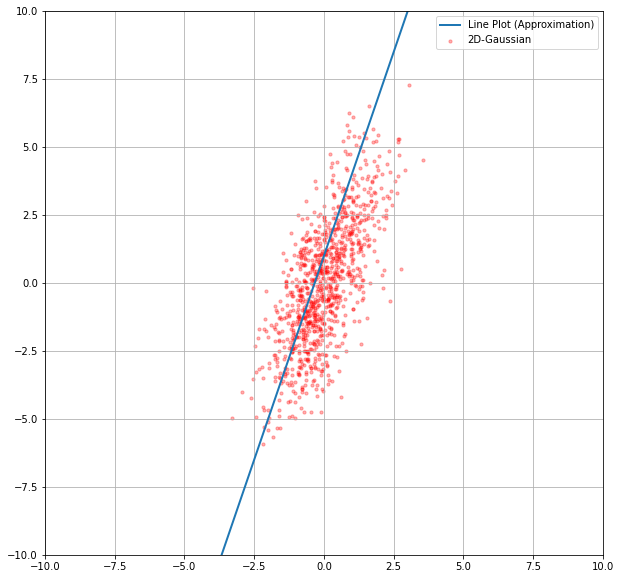

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
# c='r', dot color is red
# s=10.0, dot size is 10
# alpha=0.3, dot opacity is 0.3
ax.scatter(X[:,0], X[:,1], c='r', s=10.0, alpha=0.3, label="2D-Gaussian")
ax.grid()
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])

# Plot a line segment with x = [-10, 10] and y = 3x + 1 onto the 2D-Gaussian plot.
# Hint: use np.linspace()
x = np.linspace(-10, 10, num=100)
y = 3*x + 1

ax.plot(x, y, label='Line Plot (Approximation)', linewidth=2)
ax.legend(loc = 0)
fig.show()

### Plotting Images

In [9]:
from sklearn import datasets
digits = datasets.load_digits()
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [10]:
# Shape of the dataset 
print(digits.data.shape)

# digits.target contains the labels for each of the 1797 examples
# Report the number of unique labels present in digits.target 
# Hint: use np.unique()

unique_labels = np.unique(digits.target)

print('Number of Unique Labels:', np.size(unique_labels))

(1797, 64)
Number of Unique Labels: 10


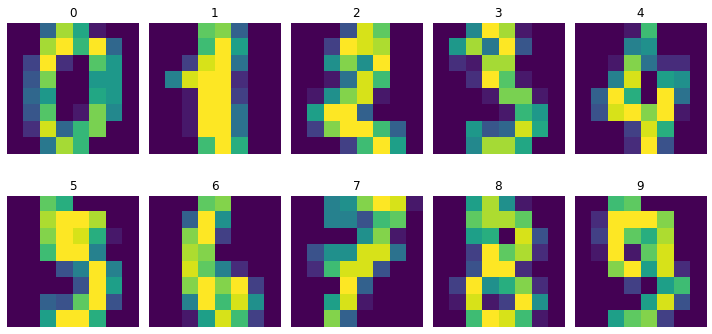

In [11]:
# Plot the first 10 examples from digits.images in a single plot (using plt.subplot)
# Use plt.imshow() for displaying the image.
# Make sure to add the label (target) of the image from digits.target to the subplot's title
# Turn off the axes description i.e., use plt.axis('off').

fig, ax = plt.subplots(2, 5, figsize=(10, 10))

count = 0
for i in range(0,2):
    for j in range(0,5):
        ax[i, j].imshow(digits.images[count])
        ax[i, j].set_title(digits.target[count])
        ax[i, j].axis('off')
        count+=1

fig.tight_layout()
plt.subplots_adjust(top=0.6)
fig.show()